In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import shutil

In [2]:
def count_files(subs):
    """Count the number of images in each folder"""
    num_files = []
    for sub in subs:
        # files = glob.glob(os.path.join("../training-images/alexis-via-axiom/raw", sub,"*.png"))
        files = glob.glob(os.path.join("../training-images/synology-104-manual", sub, "*.png"))
        num_files.append(len(files))
    return num_files
                        

In [3]:
labels = os.listdir("../training-images/alexis-via-axiom/raw")
labels = os.listdir("../training-images/synology-104-manual")
image_count = count_files(labels)
image_count, labels = zip(*sorted(zip(image_count, labels), reverse=True))
image_count = list(image_count)
labels = list(labels)
if labels[-1] == ".DS_Store":
    labels = labels[:-1]
    image_count = image_count[:-1]

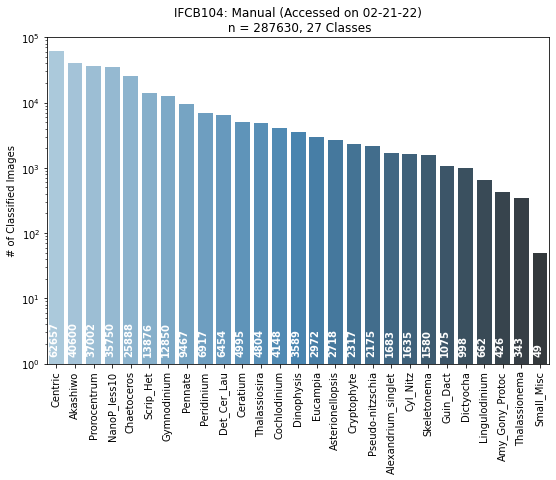

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.barplot(x=labels,y=image_count, palette="Blues_d")
ax.tick_params(axis='x', rotation=90)
ax.set_yscale('log')
ax.set_ylim(1,1e5)
ax.set_ylabel("# of Classified Images")
for i, count in enumerate(image_count):
    div_by = 1/len(image_count)
    ax.text(div_by*i + .005,.03,str(count),rotation='vertical', transform=ax.transAxes,c='w',weight='bold')

plt.title("IFCB104: Manual (Accessed on 02-21-22)\n n = {}, {} Classes".format(sum(image_count),len(image_count)))
plt.savefig("./figures/27_training_class_count_all.png",dpi=300,bbox_inches='tight')